In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,max_average_service_time,throughput,...,max_cs_queue,mean_cs_queue,mean_battery_level,index,name,go_charging,interrupted,threshold,week,GoChargingTH
1,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,111.900000,0.005719,...,1,0.001678,92.289231,1,Fixed_th30_False,Fixed,False,th30,0,Fixedth30
4,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,111.900000,0.005719,...,1,0.001678,92.289231,6,FixedCharge_th40_False,HighLow,False,th40,0,HighLow
5,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,111.900000,0.005719,...,1,0.001678,92.289231,7,Fixed_th40_False,Fixed,False,th40,0,Fixedth40
6,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,111.900000,0.005719,...,1,0.001678,92.289231,9,FixedCharge_th40_True,HighLow,True,th40,0,HighLow
9,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,109.936242,111.900000,0.005719,...,1,0.001678,92.289231,13,Fixed_th50_False,Fixed,False,th50,0,Fixedth50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,3457396.4,300053.6,178.731872,0.016138,7658632.4,4.602876e+06,0.666654,2546.992910,5802.512211,0.002459,...,31,4.716296,51.909117,37,Fixed_th90_False,Fixed,False,th90,13,Fixedth90
51,3464713.2,300000.4,178.268269,0.016158,7658177.8,4.707207e+06,0.659048,2790.589852,6607.419936,0.002459,...,34,4.639622,55.685263,43,Fixed_th100_False,Fixed,False,th100,13,Fixedth100
53,3492776.4,302971.2,180.408978,0.016266,7658390.4,4.730890e+06,0.669659,2898.756692,6766.547691,0.002459,...,32,5.170808,62.504772,54,PPO_R4_False,PPO,False,R4,13,PPOR4
54,3487081.6,294574.0,180.990142,0.016131,7658547.5,4.671596e+06,0.690428,3490.330758,6607.419936,0.002459,...,36,6.766580,62.942978,44,Opportunistic_th100_False,Opportunistic,False,th100,13,Opportunistic


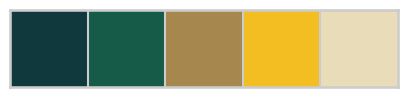

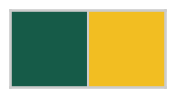

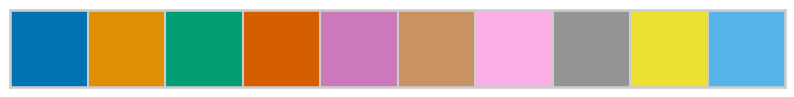

In [12]:
df_paper = pd.read_csv("./result_data_charging_wepa/charging_strat_comp/df_paper.csv", index_col=0)
display(df_paper)

custom_palette = ["#0F393D", "#165B48", "#A6874E", "#F2BE22", "#E9DCB9"]
pal5 = sns.color_palette(custom_palette)
pal2 = sns.color_palette(["#165B48", "#F2BE22"])
cbpal = sns.color_palette("colorblind")
sns.palplot(pal5)
sns.palplot(pal2)
sns.palplot(cbpal)

root_dir='.'

C:\Users\zm0714\AppData\Local\Temp\ipykernel_23060\829397348.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GoChargingTH'] = pd.Categorical(
C:\Users\zm0714\AppData\Local\Temp\ipykernel_23060\829397348.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_service_time'] /= 60


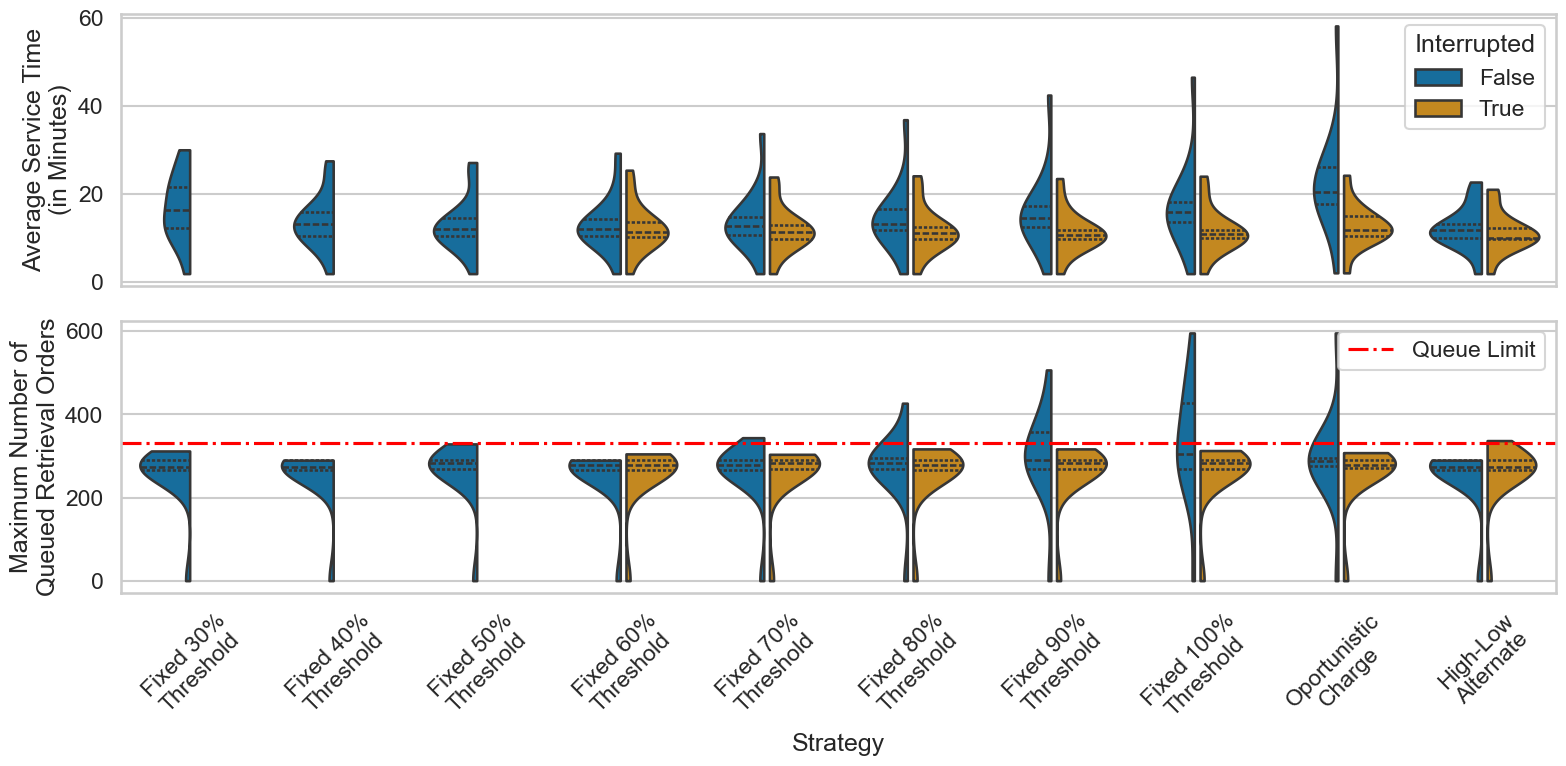

In [28]:
from itertools import cycle


sns.set_context('talk')
sns.set_style('whitegrid')



df = df_paper[(df_paper["go_charging"]!="PPO")]

heuristic_names = [
    "Fixedth30", "Fixedth40", "Fixedth50", 
    "Fixedth60", "Fixedth70", "Fixedth80", 
    "Fixedth90", "Fixedth100", 
    "Opportunistic", "HighLow"
]

heuristic_display_names = {
    "Fixedth30": "Fixed 30%\nThreshold", 
    "Fixedth40": "Fixed 40%\nThreshold", 
    "Fixedth50": "Fixed 50%\nThreshold", 
    "Fixedth60": "Fixed 60%\nThreshold", 
    "Fixedth70": "Fixed 70%\nThreshold", 
    "Fixedth80": "Fixed 80%\nThreshold", 
    "Fixedth90": "Fixed 90%\nThreshold", 
    "Fixedth100": "Fixed 100%\nThreshold", 
    "Opportunistic": "Oportunistic\nCharge", 
    "HighLow": "High-Low\nAlternate"
}

df['GoChargingTH'] = pd.Categorical(
    df['GoChargingTH'], categories=heuristic_names, ordered=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

 

# First plot

# palette = cycle(pal2)
palette = cycle(cbpal)

df['average_service_time'] /= 60
sns.violinplot(x='GoChargingTH', y='average_service_time', data=df, palette=palette, hue="interrupted", ax=ax1, 
               split=True, inner='quart', gap=0.1, cut=0)
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.set_ylabel("Average Service Time\n(in Minutes)")
ax1.legend(title='Interrupted')

# Second plot

palette = cycle(cbpal)

sns.violinplot(x='GoChargingTH', y='max_retrieval_buffer', data=df, palette=palette, hue="interrupted", ax=ax2, 
               split=True, inner='quart', gap=0.1, cut=0)
ax2.set_xticks(range(len(heuristic_names)))
ax2.set_xticklabels(labels=heuristic_display_names.values(), rotation=45)
ax2.set_xlabel("Strategy")
line = ax2.axhline(330, color='red', linestyle='dashdot', label='Buffer Limit')
ax2.get_legend().remove()
ax2.legend(handles=[line], labels=['Queue Limit'])
ax2.set_ylabel("Maximum Number of\nQueued Retrieval Orders")
 

plt.tight_layout()
plt.savefig(f'{root_dir}/kpi_retrieval_orders_service_time_vs_weeks__violin.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

In [29]:
df

,total_distance,total_shift_distance,distance_retrieval_ave,utilization_time,makespan,cycle_time,entropy,average_service_time,max_average_service_time,throughput,...,max_cs_queue,mean_cs_queue,mean_battery_level,index,name,go_charging,interrupted,threshold,week,GoChargingTH
1,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,1.832271,111.900000,0.005719,...,1,0.001678,92.289231,1,Fixed_th30_False,Fixed,False,th30,0,Fixedth30
4,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,1.832271,111.900000,0.005719,...,1,0.001678,92.289231,6,FixedCharge_th40_False,HighLow,False,th40,0,HighLow
5,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,1.832271,111.900000,0.005719,...,1,0.001678,92.289231,7,Fixed_th40_False,Fixed,False,th40,0,Fixedth40
6,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,1.832271,111.900000,0.005719,...,1,0.001678,92.289231,9,FixedCharge_th40_True,HighLow,True,th40,0,HighLow
9,114048.2,0.0,0.000000,0.015718,104214.7,0.000000e+00,0.135804,1.832271,111.900000,0.005719,...,1,0.001678,92.289231,13,Fixed_th50_False,Fixed,False,th50,0,Fixedth50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,3456326.8,302265.6,176.917859,0.016130,7658490.1,4.793603e+06,0.680861,33.682817,4463.925669,0.002459,...,29,4.534116,44.717333,25,Fixed_th70_False,Fixed,False,th70,13,Fixedth70
45,3437653.2,303402.4,176.895502,0.016133,7658654.3,4.691678e+06,0.670837,36.841422,5038.679767,0.002459,...,31,4.531992,48.419058,31,Fixed_th80_False,Fixed,False,th80,13,Fixedth80
48,3457396.4,300053.6,178.731872,0.016138,7658632.4,4.602876e+06,0.666654,42.449882,5802.512211,0.002459,...,31,4.716296,51.909117,37,Fixed_th90_False,Fixed,False,th90,13,Fixedth90
51,3464713.2,300000.4,178.268269,0.016158,7658177.8,4.707207e+06,0.659048,46.509831,6607.419936,0.002459,...,34,4.639622,55.685263,43,Fixed_th100_False,Fixed,False,th100,13,Fixedth100


In [8]:
from json import load

f = open(f'{root_dir}/2_orders__old.json', 'r')
order_dict = load(f)
f.close()

df_orders = pd.DataFrame(
    order_dict,
    columns=["Type", "SKU", "Time", "Dock", "Batch", "Week Number"])

t0 = pd.Timestamp("2024-01-01T06:00")

def to_date(series_seconds):
    global t0
    ref_date = t0
    tds = pd.to_timedelta(series_seconds, unit='s')
    return ref_date + tds

df_orders["Hour"] = to_date(df_orders['Time']).dt.hour
df_orders["Type"] = df_orders["Type"].map(lambda x: "Delivery" if x == "delivery" else "Retrieval")

C:\Users\zm0714\AppData\Local\Temp\ipykernel_23060\3550615400.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.violinplot(data=df_orders, x="Week Number", y="Hour", hue="Type", cut=0,


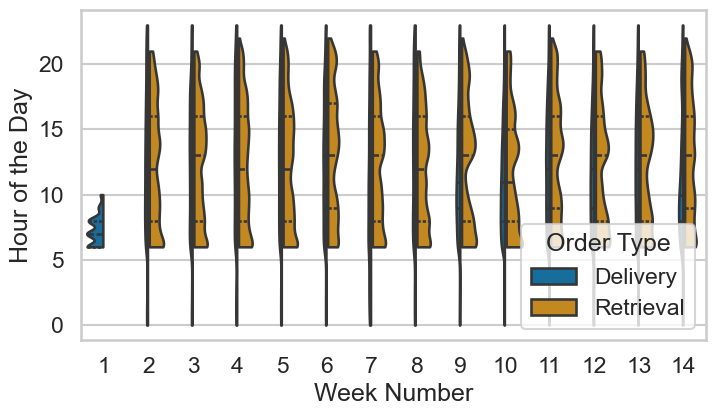

In [11]:
_, ax = plt.subplots(1, 1, figsize=(7.5, 4.5))

ax = sns.violinplot(data=df_orders, x="Week Number", y="Hour", hue="Type", cut=0,
                    split=True, inner='quart', gap=0.1, ax=ax, palette=cbpal)
ax.set_ylabel("Hour of the Day")
ax.legend(title='Order Type')
plt.tight_layout()
plt.savefig(f'{root_dir}/3_order_distribution_by_hour.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

In [15]:
layout = pd.read_csv(f"../1_environment/slapstack/slapstack/use_cases/wepastacks_bm/1_layout.csv", header=None, delimiter=",")
layout.dropna(axis=1, how='all', inplace=True)

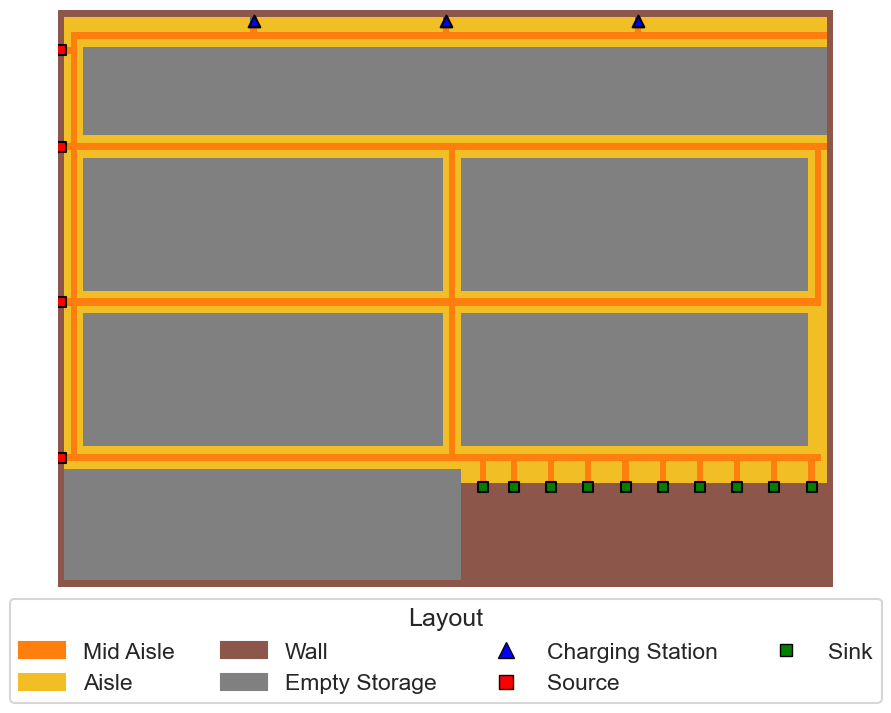

In [22]:
from matplotlib.lines import Line2D 
# Create figure and axis
_, ax = plt.subplots(figsize=(10, 7.5))

# Get unique values, drop NaNs, and create a color mapping
unique_values = np.unique(layout)
unique_values = unique_values[~np.isnan(unique_values)]
base_palette = sns.color_palette("tab10", len(unique_values) - 1)  # Exclude '0' from normal palette

color_mapping = {val: base_palette[i] for i, val in enumerate(unique_values) if val not in [0, -2]}
color_mapping[0] = "grey"      # Empty storage
color_mapping[-2] = "#f2be25"   # Aisle  
custom_cmap = mcolors.ListedColormap([color_mapping[val] for val in unique_values])
bounds = np.arange(len(unique_values) + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)

# Mapping for labels
key_map = {
    0: "Empty Storage", 
    -1: "Wall",
    -2: "Aisle",
    -3: "Source",
    -4: "Sink",
    -5: "Mid Aisle",
    -6: "Charging Station"
}

# Create heatmap with cbar=False to remove the color bar
sns.heatmap(
    data=layout, 
    cmap=custom_cmap, 
    cbar=False,  # Remove color bar
    ax=ax, 
    xticklabels=False,  # Disable x-axis labels
    yticklabels=False    # Disable y-axis labels
)

# Hide axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Remove axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Find indices for markers
y_charging, x_charging = np.where(layout == -6)
y_source, x_source = np.where(layout == -3)
y_sink, x_sink = np.where(layout == -4)

# Add markers for specific locations
ax.scatter(x_charging + 0.5, y_charging + 0.5, color="blue", s=70, marker="^", edgecolor="black", linewidth=1.5, label="Charging Station")
ax.scatter(x_source + 0.5, y_source + 0.5, color="red", s=50, marker="s", edgecolor="black", linewidth=1.5, label="Source")
ax.scatter(x_sink + 0.5, y_sink + 0.5, color="green", s=50, marker="s", edgecolor="black", linewidth=1.5, label="Sink")

# Create legend with color patches for normal areas
legend_patches = [
    mpatches.Patch(color=color_mapping[val], label=key_map[val]) 
    for val in unique_values if val not in [-6, -3, -4]
]

# Add marker handles to legend
legend_markers = [
    Line2D([0], [0], marker="^", color="w", markerfacecolor="blue", markersize=12, markeredgecolor="black", label="Charging Station"),
    Line2D([0], [0], marker="s", color="w", markerfacecolor="red", markersize=10, markeredgecolor="black", label="Source"),
    Line2D([0], [0], marker="s", color="w", markerfacecolor="green", markersize=8, markeredgecolor="black", label="Sink")
]

# Combine both into the legend
# ax.legend(handles=legend_patches + legend_markers, title="Layout", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(
    handles=legend_patches + legend_markers,
    title="Layout",
    bbox_to_anchor=(0.5, 0),  # Moves the legend directly below the plot
    loc="upper center",  # Center it horizontally
    ncol=4,  # Adjust column count as needed
    # borderaxespad=0  # Removes extra spacing
)
# Save and show
plt.savefig(f'{root_dir}/warehouse_layout.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

C:\Users\zm0714\AppData\Local\Temp\ipykernel_23060\2256360097.py:96: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  orders_ax = sns.violinplot(data=df_orders, x="Week Number", y="Hour", hue="Type", cut=0,


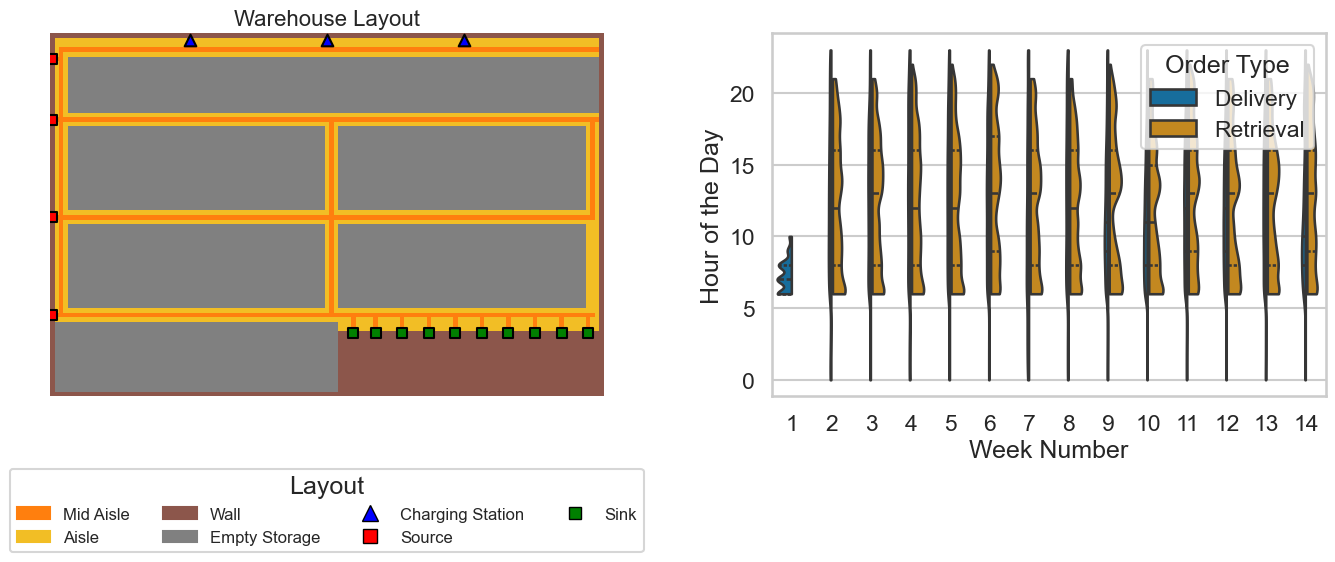

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from itertools import cycle

# Create figure with two side-by-side subplots
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

### 📌 PLOT 1: Warehouse Layout ###
layout_ax = ax[0]  # Assign first subplot

# Get unique values, drop NaNs, and create a color mapping
unique_values = np.unique(layout)
unique_values = unique_values[~np.isnan(unique_values)]
base_palette = sns.color_palette("tab10", len(unique_values) - 1)  # Exclude '0' from normal palette

# Create a color mapping dictionary
color_mapping = {val: base_palette[i] for i, val in enumerate(unique_values) if val not in [0, -2]}
color_mapping[0] = "grey"      # Empty storage
color_mapping[-2] = "#f2be25"  # Aisle color

custom_cmap = mcolors.ListedColormap([color_mapping[val] for val in unique_values])
bounds = np.arange(len(unique_values) + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)

# Mapping for labels
key_map = {
    0: "Empty Storage", 
    -1: "Wall",
    -2: "Aisle",
    -3: "Source",
    -4: "Sink",
    -5: "Mid Aisle",
    -6: "Charging Station"
}

# Create heatmap for warehouse layout
sns.heatmap(
    data=layout, 
    cmap=custom_cmap, 
    cbar=False,  
    ax=layout_ax, 
    xticklabels=False, 
    yticklabels=False
)

# Hide axis ticks and remove spines
layout_ax.set_xticks([])
layout_ax.set_yticks([])
for spine in layout_ax.spines.values():
    spine.set_visible(False)

# Find indices for markers
y_charging, x_charging = np.where(layout == -6)
y_source, x_source = np.where(layout == -3)
y_sink, x_sink = np.where(layout == -4)

# Add markers for special locations
layout_ax.scatter(x_charging + 0.5, y_charging + 0.5, color="blue", s=70, marker="^", edgecolor="black", linewidth=1.5, label="Charging Station")
layout_ax.scatter(x_source + 0.5, y_source + 0.5, color="red", s=50, marker="s", edgecolor="black", linewidth=1.5, label="Source")
layout_ax.scatter(x_sink + 0.5, y_sink + 0.5, color="green", s=50, marker="s", edgecolor="black", linewidth=1.5, label="Sink")

layout_ax.set_title("Warehouse Layout", fontsize=16)

# Create legend handles for color patches (excluding special markers)
legend_patches = [
    mpatches.Patch(color=color_mapping[val], label=key_map[val]) 
    for val in unique_values if val not in [-6, -3, -4]
]

# Create legend handles for special markers
legend_markers = [
    Line2D([0], [0], marker="^", color="w", markerfacecolor="blue", markersize=12, markeredgecolor="black", label="Charging Station"),
    Line2D([0], [0], marker="s", color="w", markerfacecolor="red", markersize=10, markeredgecolor="black", label="Source"),
    Line2D([0], [0], marker="s", color="w", markerfacecolor="green", markersize=8, markeredgecolor="black", label="Sink")
]

# Place the legend **below** the warehouse layout plot
layout_ax.legend(
    handles=legend_patches + legend_markers,
    title="Layout",
    loc="upper center",  # Center the legend horizontally
    bbox_to_anchor=(0.5, -0.2),  # Adjust this value to position the legend below the plot
    fontsize=12,
    ncol=4,
    borderaxespad=0  # Removes extra spacing
)

### 📌 PLOT 2: Orders Per Week Barplot ###
orders_ax = ax[1]  # Assign second subplot
orders_ax.ticklabel_format(axis='x', style='sci')

orders_ax = sns.violinplot(data=df_orders, x="Week Number", y="Hour", hue="Type", cut=0,
                    split=True, inner='quart', gap=0.1, ax=orders_ax, palette=cbpal)
orders_ax.set_ylabel("Hour of the Day")
orders_ax.legend(title='Order Type')

# Barplot settings
# orders_ax.ticklabel_format(axis='x', style='sci')
# orders_ax = sns.barplot(ax=orders_ax, x="week", y="order", data=all_partitions_df.groupby(by="week").count(), color=pal[3])
# 
# # Label axes
# orders_ax.set_ylabel("# Orders", fontsize=16)
# orders_ax.set_xlabel("Week", fontsize=16)
# orders_ax.set_title("Orders Per Week", fontsize=16)

### 🔧 Adjust spacing to make room for legend 🔧
plt.subplots_adjust(bottom=0.25)  # Increased bottom margin to fit the legend

# Adjust layout to fit both plots nicely
plt.tight_layout()

# Save and show the combined figure
plt.savefig(f'{root_dir}/combined_warehouse_orders.png', dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()
